# <center>Classification -- Predicting Customer Churn</center>

### <center>San Francisco</center>

# [1] Objective

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# [2] Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

# [3] Important Libraries
The following libraries shall be used in this project:
#### 1. numpy
    - NumPy is a Python library for numerical computations. It is widely used for scientific computing, data analysis, and machine learning.
#### 2. pandas
    - Pandas is a Python library that provides data structures and tools for data manipulation and analysis. It is commonly used for data wrangling and cleaning, and exploratory data analysis.
#### 3. sklearn
    - Scikit-learn (or sklearn) is a Python library for machine learning that provides tools for classification, regression, clustering, and dimensionality reduction, as well as for evaluating and tuning models. It offers a consistent API, handles various types of input data, and integrates well with other Python libraries such as NumPy, pandas, and matplotlib.
#### 4. matplotlib
    - Matplotlib is a Python library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions for creating line plots, scatter plots, bar plots, histograms, heatmaps, and more, and allows for customization of the style, labels, and axes of plots.
#### 5. seaborn
    -Seaborn is a Python library for creating statistical visualizations built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics such as heatmaps, scatter plots, line plots, bar plots, and distribution plots. It is commonly used for exploratory data analysis and data visualization. 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Save Model for future use
import joblib

# [4] Getting the Data
- We shall use one csv file called Telco_Customer_Churn.csv in this project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_telco_cust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Telco_Customer_Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df_telco_cust = pd.read_csv('/home/penscola/Desktop/Project/GIT_LP3/Data/Telco_Customer_Churn.csv')

In [ ]:
# See first 5 rows of df_telco_cust

df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get more information about the dataset
df_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# [5] Data Cleaning

### See if there are any missing values in df_telco_cust

In [ ]:
# See if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Check for duplicates in the dataset

In [ ]:
# Checking for duplicates
df_telco_cust.drop_duplicates(inplace=True, keep='first')

In [ ]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There were no duplicates in the dataset

### See all unique values in every column in df_telco_cust dataset

In [ ]:
# see all unique values in every column in df_telco_cust dataset
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### Show  the number of unique values per column

In [ ]:
#  the number of unique values per column
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


# [6] Transformation and Feature Engineering

### Check the data types of the TotalCharges and MonthlyCharges columns in the df_telco_cust dataframe

In [ ]:
# Check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)
print(df_telco_cust['MonthlyCharges'].dtype)

object
float64


### Check if there are any non-numeric values in df_telco_cust['TotalCharges']

In [ ]:
# Check for non-numeric values by checking for NaN values in the column
has_non_numeric_values = df_telco_cust['TotalCharges'].isnull().any()

if has_non_numeric_values:
    print("There are non-numeric values in the 'TotalCharges' column.")
else:
    print("All values in the 'TotalCharges' column are numeric.")

All values in the 'TotalCharges' column are numeric.


### Transform TotalCharges from object to float data type
To transform the TotalCharges column from object to float in the df_telco_cust dataframe, we can use the astype() method of pandas.

In [ ]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
df_telco_cust['TotalCharges'] = pd.to_numeric(df_telco_cust['TotalCharges'], errors='coerce')

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# df_telco_cust['TotalCharges'] = imputer.fit_transform(df_telco_cust[['TotalCharges']])

In [ ]:
# Again check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)

float64


In [ ]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# See again if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# [7] Univeriate Analysis

#### Gender
- The code below creates a horizontal bar chart showing the count of each gender in the "gender" column of the "df_telco_cust" DataFrame.

- The "value_counts()" method is used to count the number of occurrences of each gender in the "gender" column, and the resulting object is stored in the "gender_count" variable.

- A list of two colors, "red" and "green", is created and stored in the "colors" variable.

- The "plot()" method of the "gender_count" object is then used to create a horizontal bar chart, with the "kind" parameter set to "barh" to specify the chart type and the "color" parameter set to "colors" to specify the color scheme.

- A for loop is used to loop through each bar in the chart and annotate the actual count in the center of each bar using the "text()" method of the "ax" object.

- Finally, the chart is given a title, labels for the x and y axes, and a size using various functions of the "plt" module, and displayed using the "show()" method of the "plt" module.

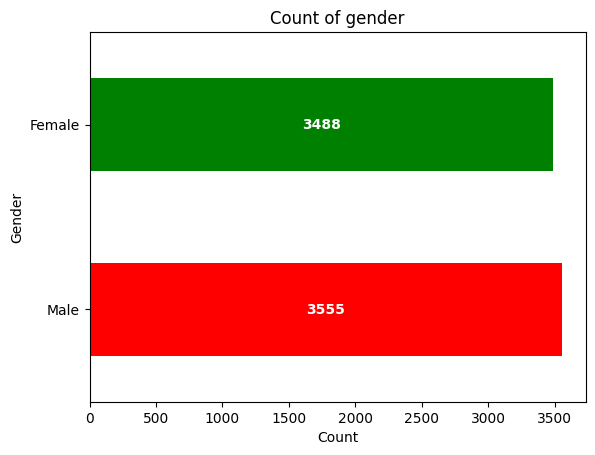

<Figure size 600x400 with 0 Axes>

In [ ]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = df_telco_cust['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)


# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

From the plot we see that Female and Male are almost equally distributed with a difference of only 67.

### Senior Citizens
- The code below creates a horizontal bar chart that displays the count of senior and non-senior citizens in a dataset. The code first uses the value_counts() function to count the number of occurrences of each value in the 'SeniorCitizen' column of the dataset. It then creates a list of colors to use in the bar chart and uses the plot() function of the citizen_count object to create a horizontal bar chart.

- The code then loops through the bars and annotates the actual count in the center of each bar using the text() function. - Finally, the code adds a label, title, and size to the chart before displaying it using plt.show().

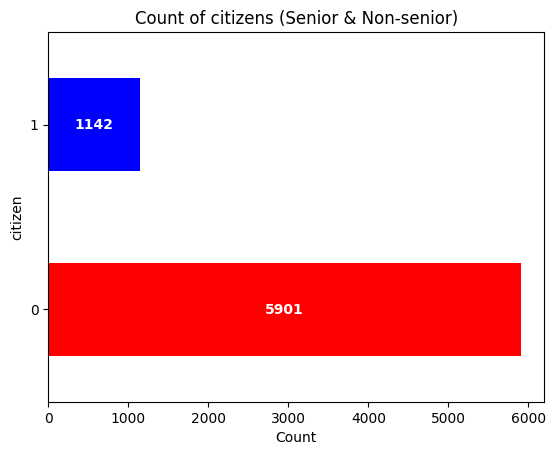

<Figure size 600x400 with 0 Axes>

In [ ]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens 
citizen_count = df_telco_cust['SeniorCitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'blue']

# This line creates the horizontal bar chart using the plot() function of the citizen_count object
ax = citizen_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    
# Adding label, title and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

From the plot see that the ratio of Senior Citizens to Non-Senior Citizen is about 1:5. With Non-Seniors constituting about 84% of the whole distribution.

### Tenure
The code below creates a histogram plot for the 'tenure' variable from the 'df_telco_cust' dataframe using the Seaborn library in Python.

- The 'sns.histplot' function is used to create the histogram plot, with the 'df_telco_cust['tenure']' argument specifying the data to be plotted.

- The 'kde=True' argument adds a kernel density estimate plot to the histogram, providing a smoothed line that shows the distribution of values in the data.

- The 'color' argument is used to set the color of the histogram bars to red.

- Overall, the code is a simple and effective way to visually explore the distribution of values in the 'tenure' variable of the 'df_telco_cust' dataframe.

<Axes: xlabel='tenure', ylabel='Count'>

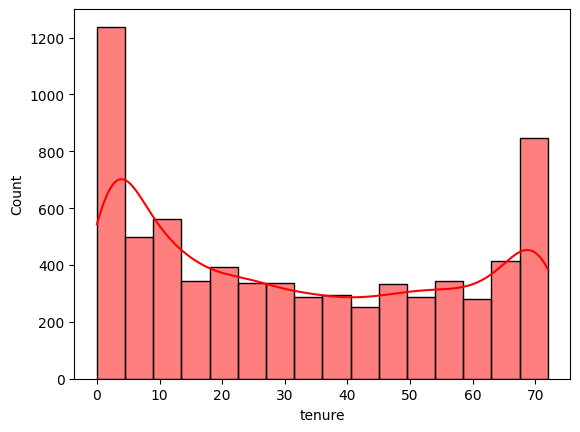

In [ ]:
# creates a histogram plot using the Seaborn library in Python.
sns.histplot(df_telco_cust['tenure'], kde=True, color='red')

From the graph, we visualize that there is almost a uniform distribution of Tenure between 10 to 65 months at about 400 customers each and a peek of slightly above 1200 customers with a Tenure 0-5 months and a gain a peek of about 800 customers with a Tenure of 70 and above months.

### Streaming Movies
The code below generates a horizontal bar chart that displays the count of different streaming movies that customers have subscribed to.

1. The first line counts the number of occurrences of each value in the 'StreamingMovies' column of the DataFrame and stores the result in the S_movie_count variable.

2. The second line creates a list of three colors to be used in the horizontal bar chart.

3. The third line creates the horizontal bar chart using the plot() method of the S_movie_count object with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors.

4. The fourth line uses a for loop to annotate the actual count of each value in the center of its respective bar.

5. Finally, the code adds a title and labels for the x and y-axes, sets the size of the figure, and shows the plot using the show() function.

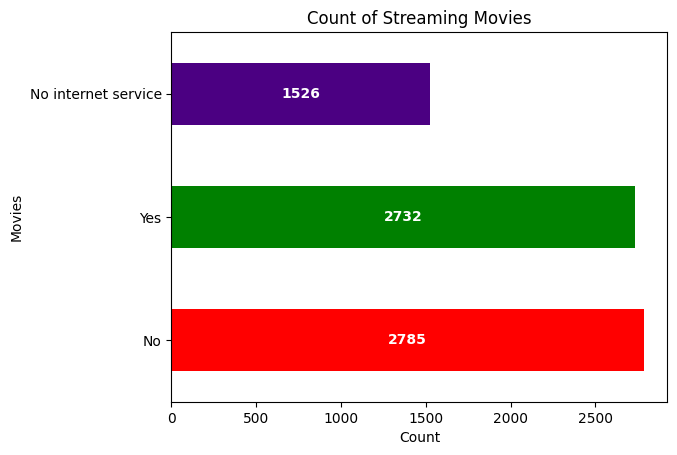

<Figure size 600x400 with 0 Axes>

In [ ]:
# First, we obtain a count of the different values in the 'StreamingMovies' 
# column of a Pandas DataFrame named 'df_telco_cust'
S_movie_count = df_telco_cust['StreamingMovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green', 'indigo']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = S_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(S_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

Customers who have streaming movies connections are 2732 and those without are 2785 (only a difference of 53 between the two) with those with no Internet being only 1526.

### MultipleLines
The code below is plotting a horizontal bar chart that shows the count of customers with multiple phone lines, categorized by the different types of multiple lines available to them.

1. First, the code creates a Pandas Series object called Multi_count that contains the count of each unique value in the 'MultipleLines' column of the 'df_telco_cust' DataFrame.

2. Next, a list of colors is defined to be used for the bars in the horizontal bar chart.

3. Then, the horizontal bar chart is created using the plot() method of the Multi_count object, with the kind parameter set to 'barh' for horizontal bars and the color parameter set to the list of colors previously defined.

4. After that, the code loops through each bar in the chart and annotates the actual count in the center of each bar using the text() method.

5. Finally, the code adds a title, xlabel and ylabel to the chart using the title(), xlabel() and ylabel() methods, respectively, and sets the figure size using the figure() method. The chart is then displayed using the show() method.

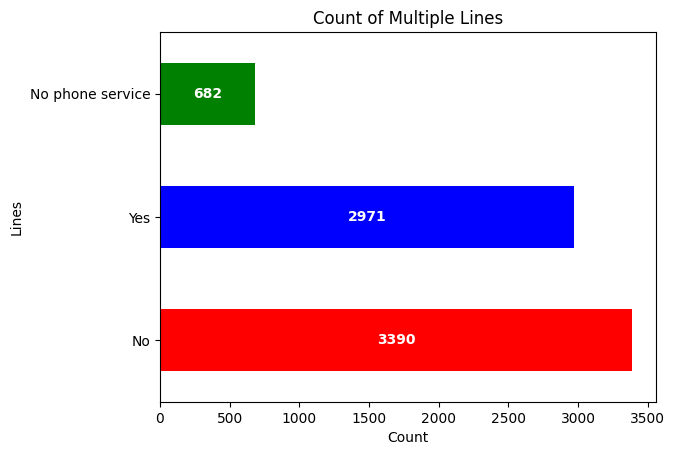

<Figure size 600x400 with 0 Axes>

In [ ]:
# First, we obtain a count of the different values in the 'MultipleLines' 
# column of a Pandas DataFrame named 'df_telco_cust'
Multi_count = df_telco_cust['MultipleLines'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars,and the color parameter set to the list of colors we defined earlier
ax = Multi_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Multi_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

The bar graph shows the distribution of customers with or without Multiplelines as follows: No Multiple lines: 48%, With Multiplelines: 42% and  those with no phone services: 10%.

### Online Security
The code below createsa horizontal bar chart to display the count of different values in the 'OnlineSecurity' column of a Pandas DataFrame named 'df_telco_cust'.

1. The first line of the code counts the number of occurrences of each value in the 'OnlineSecurity' column of the 'df_telco_cust' DataFrame, and stores the result in the variable 'Security_count'.

2. Then, a list of colors for the bars in the horizontal bar chart is defined as 'colors'.

3. The horizontal bar chart is created using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors defined earlier. The resulting plot is stored in the variable 'ax'.

4. Next, a loop is used to iterate through each bar in the plot and annotate the actual count of each value in the center of each bar.

5. Finally, the plot is given a title, axis labels, and a size, and is displayed using the matplotlib.pyplot.show() function.

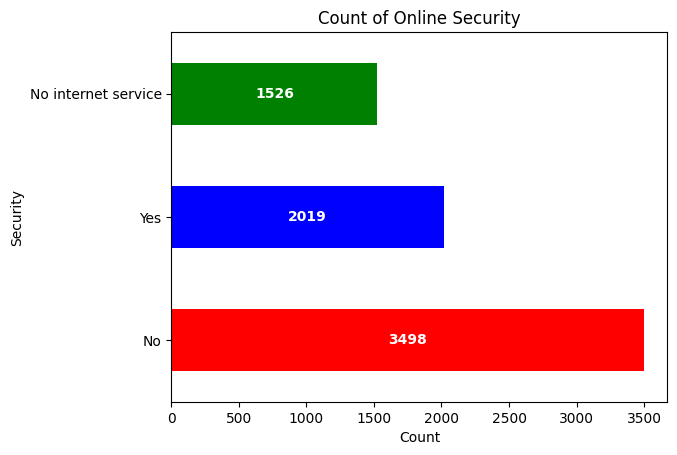

<Figure size 600x400 with 0 Axes>

In [ ]:
# First, we obtain a count of the different values in the 'OnlineSecurity' 
# column of a Pandas DataFrame named 'df_telco_cust'
Security_count = df_telco_cust['OnlineSecurity'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter 
# set to 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = Security_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Security_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

The graph shows that customers without Online Security constitute around 50% followed by those with online security at 29% and the rest have no Internet service.

### Partner
The code below creates a horizontal bar chart to show the count of customers who have a partner and those who don't.

1. The first line of code gets the count of the different values in the 'Partner' column of the Pandas DataFrame 'df_telco_cust' using the value_counts() method.

2. Next, a list of colors for the bars in the horizontal bar chart is defined.

3. The horizontal bar chart is then created using the plot() method of the partner_count object with the parameters kind='barh' for horizontal bars and color=colors for the colors of the bars.

4. The for loop is used to loop through the bars and annotate the actual count in the center of each bar using the text() method of the ax object.

5. Finally, the code adds labels, title, and sets the figure size before displaying the chart using the show() method of the pyplot module in matplotlib.

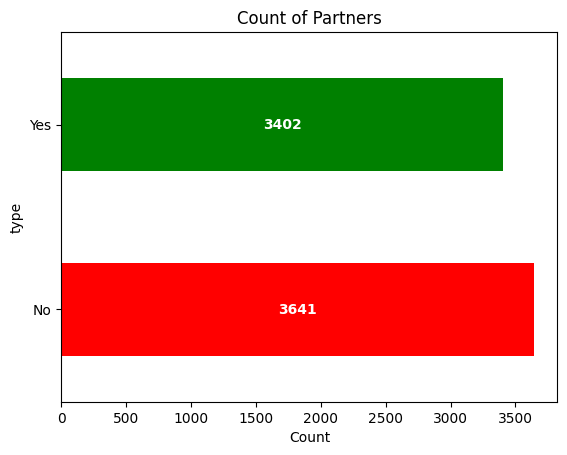

<Figure size 600x400 with 0 Axes>

In [ ]:
# First, we obtain a count of the different values in the 'Partner' 
# column of a Pandas DataFrame named 'df_telco_cust'
partner_count = df_telco_cust['Partner'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = partner_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(partner_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

Customers without partners make the majority at around 52% and those with parners at 48%.

# [8] Bivariate and Multivariate Analysis

## Bivariate Analysis
### Gender vs Churn
The code below creates a pivot table from a Pandas DataFrame df_telco_cust. The pivot_table() method is used to group and aggregate the data based on the provided parameters. The pivot table is created by specifying that the values to be aggregated are in the 'Contract' column, with the index being the 'gender' column, and the columns being the 'Churn' column. The aggregation function is set to 'count', which counts the number of occurrences of each unique combination of 'gender' and 'Churn'.

The resulting pivot table is printed using the print() function. It will display the counts of the 'Contract' column for each unique combination of 'gender' and 'Churn' in a tabular format.

In [ ]:
# Create a pivot table of contracts counts by gender and churn
pivot_table = pd.pivot_table(df_telco_cust, values = ['Contract'], index=['gender'], columns=['Churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


## Visualization
The code below generates a stacked bar chart of the pivot table created in the previous code block.

1. pivot_table.plot(kind='bar', stacked=True) creates the bar chart with the stacked parameter set to True to stack the bars on top of each other.

2. plt.title('Count of Contract by gender and Churn') sets the chart title to "Count of Contract by gender and Churn". plt.xlabel('gender') sets the x-axis label to "gender", and plt.ylabel('Count') sets the y-axis label to "Count".

3. plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) adds a legend to the chart with the location set to 'upper right' and the bounding box anchor set to (1.2, 1), which means that the legend will be located outside the plot area to the right and above the chart.

4. plt.xticks(rotation=0) adjusts the rotation of the x-axis labels to be horizontal for better readability.

5. Finally, plt.show() displays the chart.

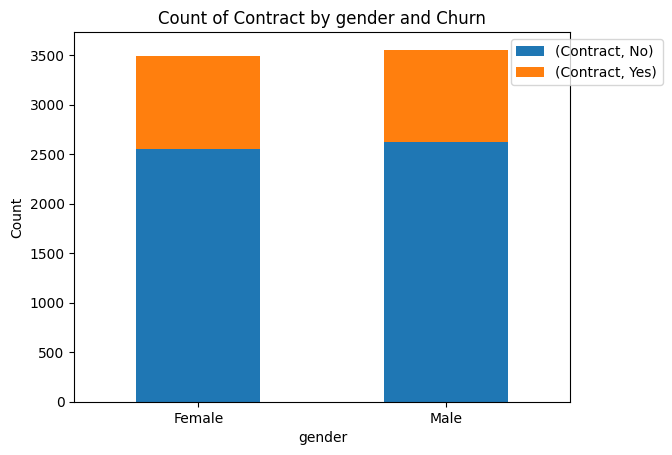

In [ ]:
# We create a bar chart using a pivot table with the Pandas plot() method, with the kind parameter set to 
# 'bar' for vertical bars, and the stacked parameter set to True to stack the bars on top of each other
pivot_table.plot(kind='bar', stacked=True)

# Adding label, title and size
plt.title('Count of Contract by gender and Churn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# We adjust the rotation of the x-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

The stacked-bar chart shows that Female and Male are almost uniformly distributed considering those who churn and those who don't.

### SeniorCitizens vs Churn
The code below creates a bar plot using the Seaborn library. 
- It visualizes the relationship between the SeniorCitizen column and Churn column of a given Pandas DataFrame df_telco_cust. 
- The x parameter specifies the column to be plotted on the x-axis and the y parameter specifies the column to be plotted on the y-axis. 
- The hue parameter specifies the column to use to distinguish the different bars in the plot. In this case, the hue parameter is set to 'gender', which means that the bars are grouped by gender. 
- The resulting plot shows the count of churned and non-churned customers based on whether they are senior citizens or not, with bars distinguished by gender.

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

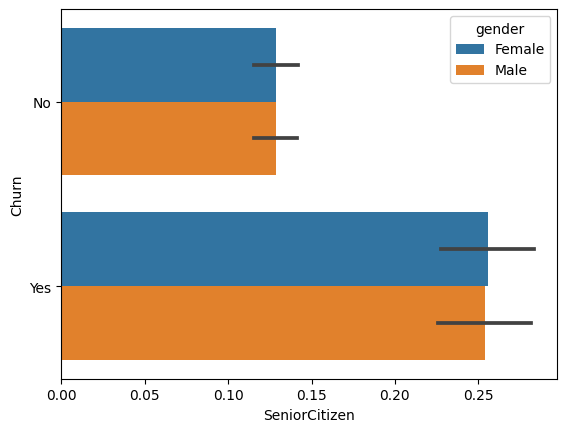

In [ ]:
sns.barplot(data=df_telco_cust, x='SeniorCitizen', y='Churn', hue='gender')

The graph shows that many senior citizens churn and the distribution is uniform between male and female.

### Partner vs Churn
The code below creates a count plot with the x-axis being Partner and the hue (color) representing Churn. The plot will show the number of customers who churned and who didn't churn with and without a partner.

<Axes: xlabel='Partner', ylabel='count'>

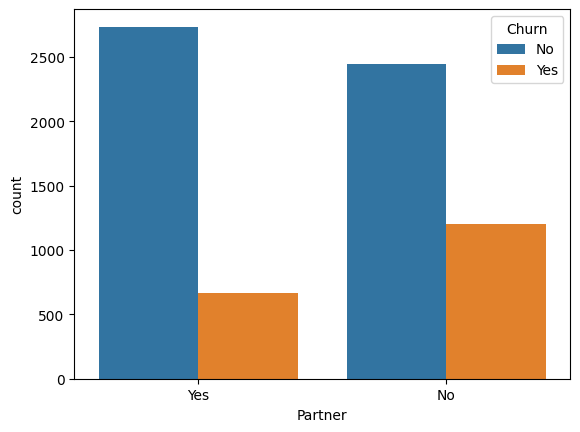

In [ ]:
sns.countplot(data=df_telco_cust, x='Partner', hue='Churn')

Those without partners tend to churn more than those with partners.

### Dependent vs 
The code below creates a bar plot with the number of customers with and without Dependents, grouped by whether they have Churned or not. The countplot() function in seaborn counts the number of occurrences of each category and creates a bar plot of the counts.

<Axes: xlabel='Dependents', ylabel='count'>

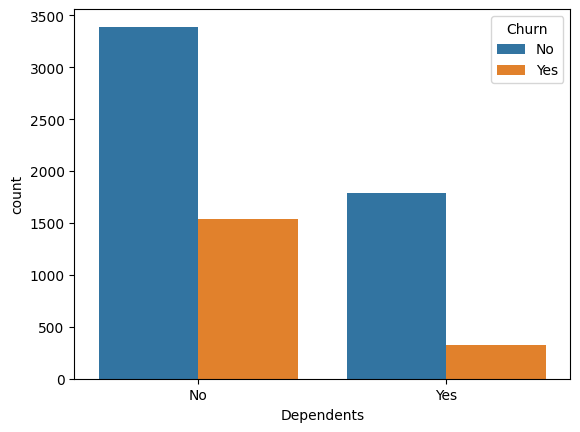

In [ ]:
sns.countplot(x='Dependents', hue='Churn', data=df_telco_cust)

Those without dependents tend to churn more than those with dependents.

### MonthlyCharges vs Churn
- The code below creates a box plot using Seaborn library to visualize the relationship between the "MonthlyCharges" and "Churn" variables in the "df_telco_cust" dataset.

- The box plot is created using the boxplot() function in Seaborn, with "MonthlyCharges" as the x-axis and "Churn" as the y-axis. The data parameter specifies the DataFrame to use.

- After creating the box plot, the code sets the x-axis and y-axis labels using xlabel() and ylabel() functions, respectively. It also sets the title of the plot using title() function.

- Finally, the code displays the plot using show() function.

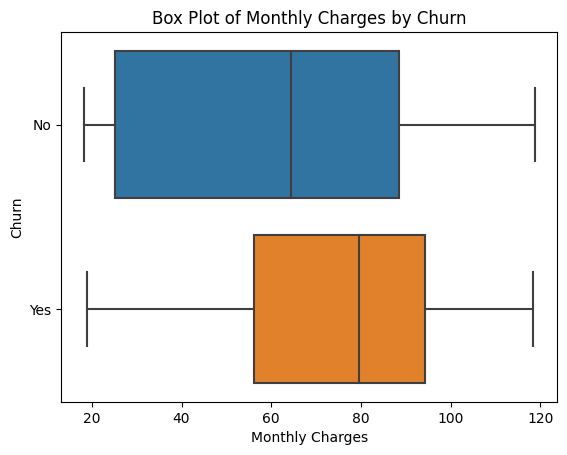

In [ ]:
# create a box plot using boxplot() function
sns.boxplot(x="MonthlyCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

- By looking at the box plot, we can see that there are significant differences in the distribution of monthly charges for customers who churned compared to those who did not churn. 
    1. The median for those who don't churn is about 62 with 1st quartile of about 25 and 3rd quartile of about 90.
    2. The median for those who churn is about 80 with 1st quartile of about 55 and 3rd quartile of about 95.

### TotalCharges vs Churn
The code below creates a box plot to show the distribution of total charges for customers who have churned versus those who have not churned.

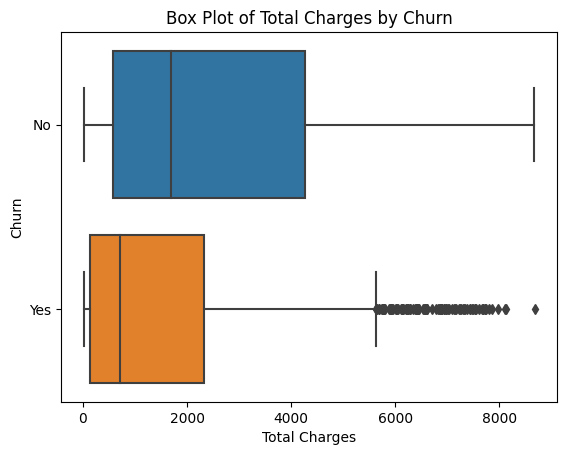

In [ ]:
# create a box plot using boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

Customers who tend to churn have their median Total Charges of about 500 but with several outliers beyond 5000.

### Internet Service vs Churn
The below creates a count plot showing the number of customers in each category of Internet Service (DSL, Fiber optic, or No) with the hue representing the Churn status (Yes or No).

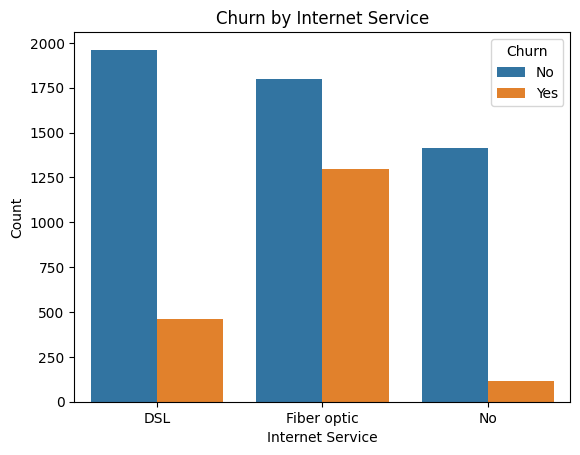

In [ ]:
sns.countplot(data=df_telco_cust, x='InternetService', hue='Churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

It appears that those who churn most are those with Fiber optic Internet Service.

### PaymentMethod vs Churn
The code below generates a stacked bar chart that shows the relationship between Payment Method and Churn in the telco customer dataset.

1. The code first creates a contingency table of PaymentMethod and Churn using the pd.crosstab() function. This table summarizes the number of customers who churned and did not churn for each payment method.

2. Then, the code sets the figure size using plt.figure(figsize=(16,14)) and creates a stacked bar plot of the contingency table using payment_churn_table.plot(kind='bar', stacked=True). The stacked bar plot shows the number of customers for each payment method, with the different colors representing the number of customers who churned and did not churn.

3. Finally, the code sets the plot title, axis labels, and rotates the x-axis labels for better visibility using plt.title(), plt.xlabel(), plt.ylabel(), and plt.xticks(rotation=15) functions respectively. The plot is then displayed using plt.show().

<Figure size 1600x1400 with 0 Axes>

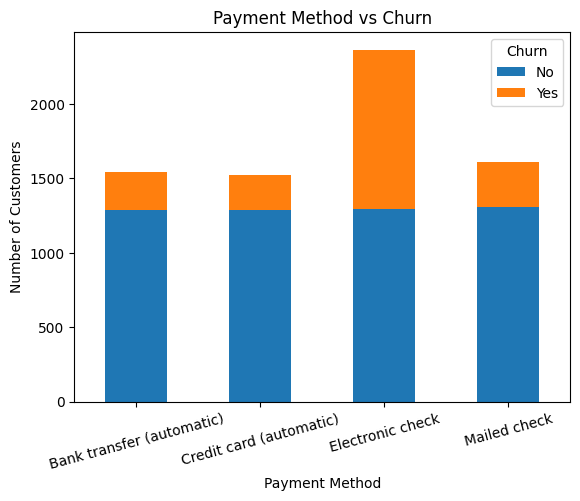

In [ ]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(df_telco_cust['PaymentMethod'], df_telco_cust['Churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

From the stack-bar chart it appears that those who churn most are those with Electronic check as a Payment Method.

## Multivariate Analysis

### Correletation of the Features in the dataset
The resulting heatmap shows the correlation coefficients between all pairs of variables in the dataset. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker or no correlations. The diagonal of the matrix (i.e., the correlation of each variable with itself) is always 1.

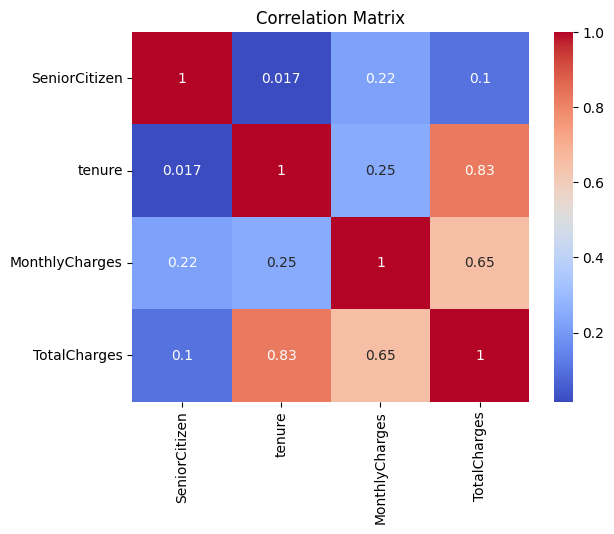

In [ ]:
# compute the correlation matrix
corr_matrix = df_telco_cust.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

From the heatmap, we seen that there is very high correlation (0.82) between TotalCharges and tenure, also a fairly strong correlation of 0.65 between TotalCharges and MonthlyCharges.

### Scatter Matrix
- In the codebelow, we first select the columns that we want to include in the scatter plot matrix (in this case, tenure, MonthlyCharges, TotalCharges, and Churn). 
- We then create the scatter plot matrix using the pairplot() function from the Seaborn library. 
- The hue parameter is set to Churn so that the scatter plots are colored by the Churn variable. 
- The diag_kind parameter is set to 'hist' to show histograms on the diagonal instead of scatter plots. 
- Finally, we display the plot using plt.show().

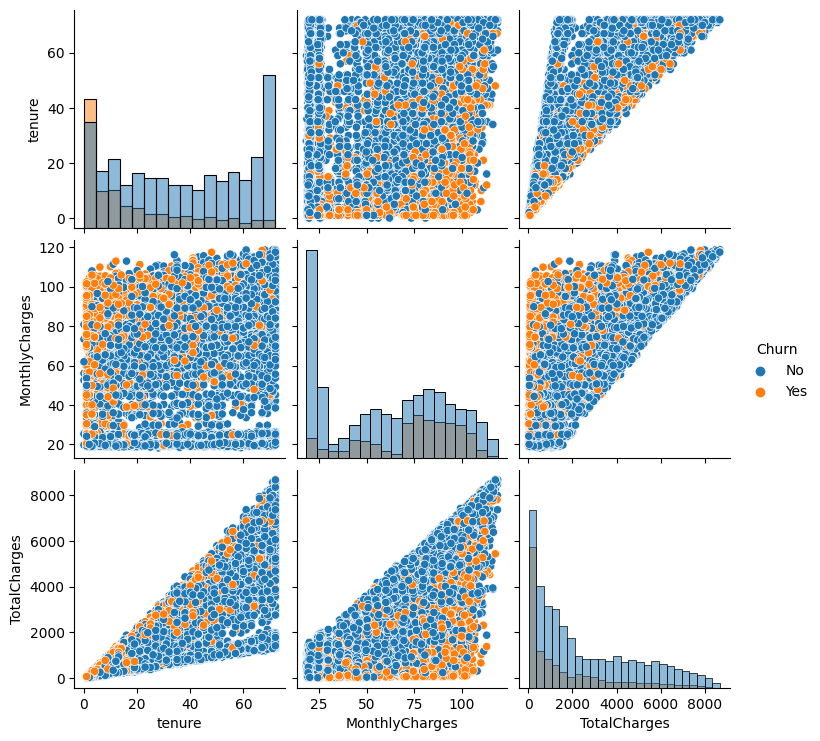

In [ ]:
# select columns to include in the scatter plot matrix
cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create scatter plot matrix using pairplot() function
sns.pairplot(df_telco_cust[cols], hue='Churn', diag_kind='hist')

# display the plot
plt.show()

From the Scatter Maatrix:
- Those with less than 40 months and MonthlyCharges above 80 tend to churn a lot.
- Those with MonthlyCharges in excess of 75 and TotalCharges below 4000 tend to churn more.
- And that tenure and TotalCharges have positive correlation

# [9] Questions and Hypotheses Testing

To further understand the Data we are going to ask and provide answers to the following questions and hypothesis

## Questions
1. <b>Does the type of internet service affect churn rate?<b>
2. <b>Are customers who have paperless billing more likely to churn?<b>
3. <b>Does the tenure of a customer affect churn rate?<b>
4. <b>Does having multiple lines affect churn rate?<b>
5. <b>Are customers on month to month contracts more likely to churn compared to customers on long term contracts<b>
    
## Hypothesis NO.1

H0: <b>The type of internet service does not affect churn rate<b>
    
H1: <b>customers Dsl or no internet service are more likely to churn compared to customers with fiber optic<b>

## Hypothesis NO.2

H0: <b>Paperless billing does not affect churn rate<b>
    
H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

## Hypothesis NO.3
H0: <b>Tenure of a customer does not affect churn rate<b>
    
H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

### [Q1] Does the type of internet service affect churn rate?

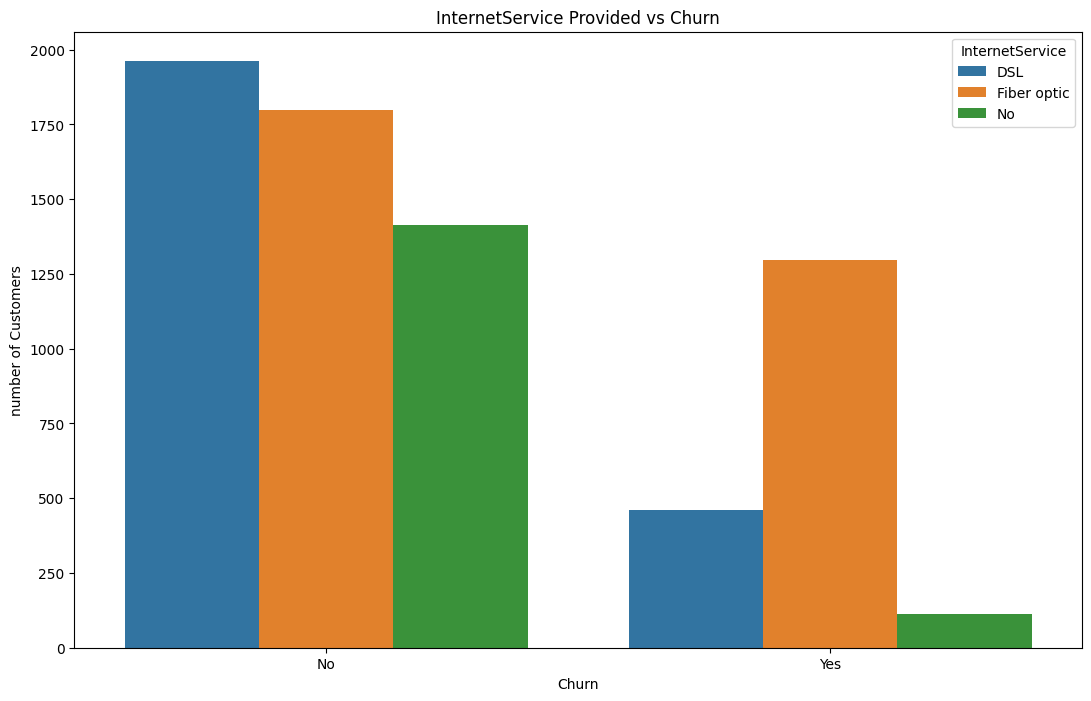

In [ ]:
#Groupby the internet service type and churn

int_type=df_telco_cust.groupby(by=["InternetService","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(x=int_type["Churn"],y = int_type["count"],hue=int_type["InternetService"]);
plt.title("InternetService Provided vs Churn");
plt.ylabel("number of Customers");

- A lot of customers using the Fiber optic seems to leave the the company followed by DSL.
- As shown in the plot above further analysis will have to be made as to why, fiber users tend to leave the company the most

## [Q2] Are customers who have paperless billing more likely to churn?

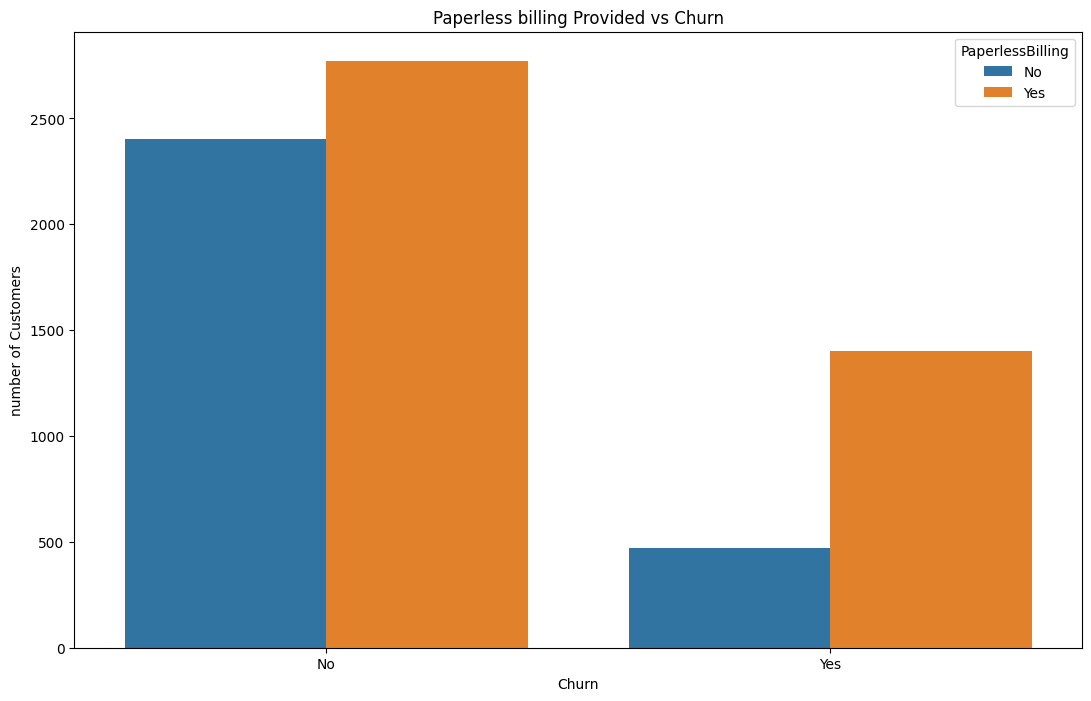

In [ ]:
int_type=df_telco_cust.groupby(by=["PaperlessBilling","Churn"],as_index=False)["Churn"].value_counts(ascending=False)
plt.figure(figsize=(13,8))
sns.barplot(x = "Churn",y = "count",data=int_type,hue="PaperlessBilling");
plt.title("Paperless billing Provided vs Churn");
plt.ylabel("number of Customers");

Most people with paperless billing tend to churn however it looks like the main reason they churn is not the billing type as the number of people who churned is relatively small comapared to the type of internet service.

## [Q3]Does the tenure of a customer affect churn rate?

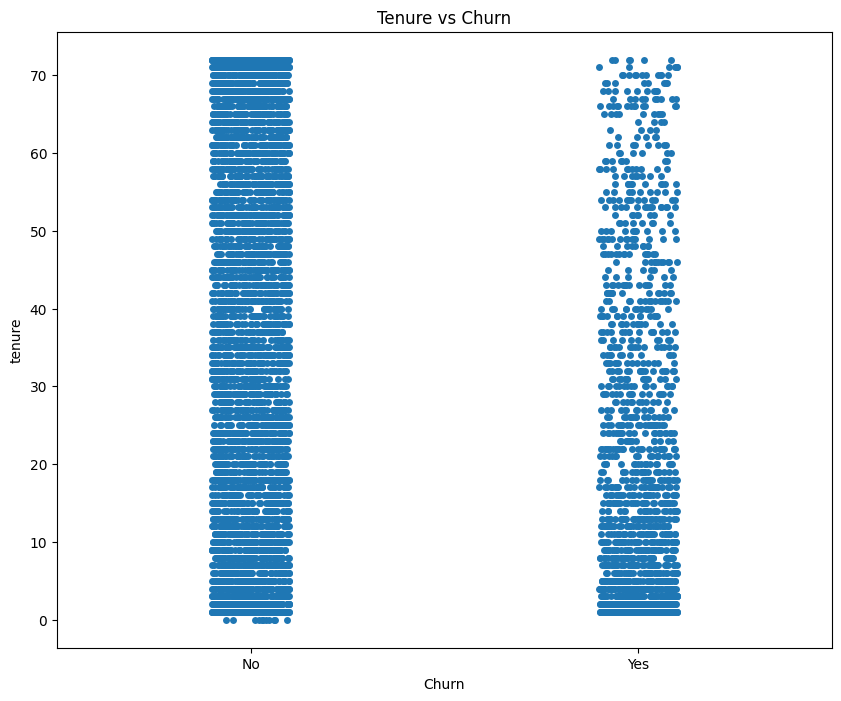

In [ ]:
plt.figure(figsize=(10,8))
#make a stripplot
sns.stripplot(x="Churn",y="tenure",data=df_telco_cust);
plt.title("Tenure vs Churn");

- The stripplot above give a scatter view of the churn rate from the plot, people with higher tenure tend to stay. 
- People who just joined the company within 0 to 3 years tend to churn

## [Q4] Does having multiple lines affect churn rate?

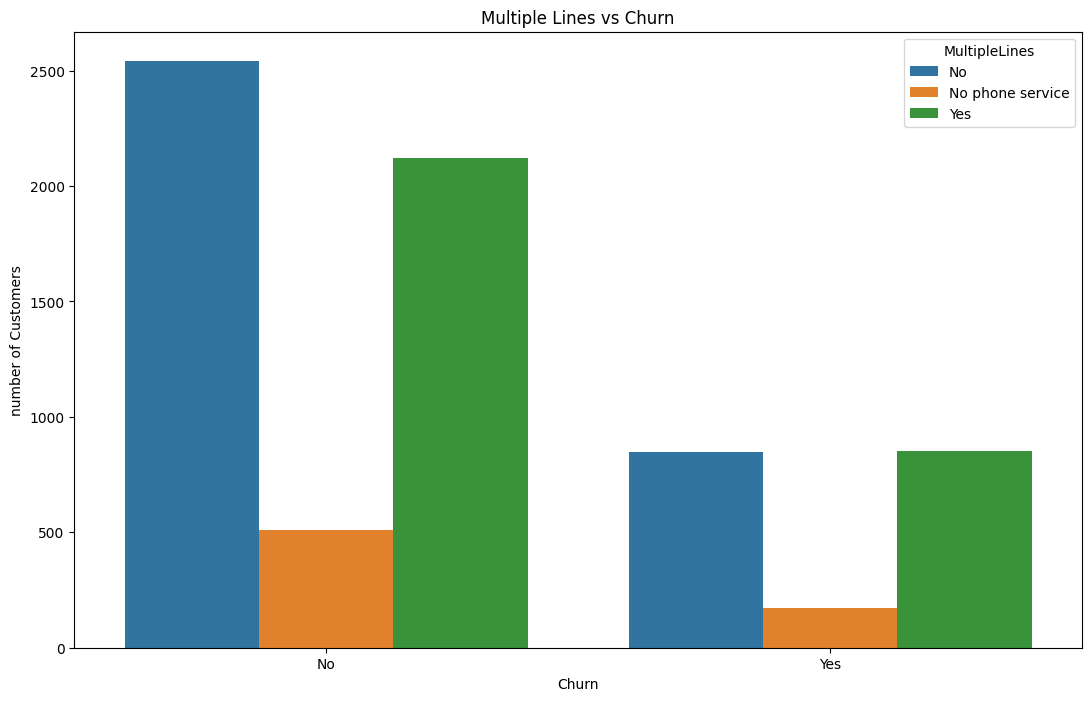

In [ ]:
int_type=df_telco_cust.groupby(by=["MultipleLines","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(x = int_type["Churn"], y = int_type["count"],hue=int_type["MultipleLines"]);
plt.title("Multiple Lines vs Churn");
plt.ylabel("number of Customers");

### People with and without multiple lines tend to churn equally.

## [Q5] Are customers on month to month contracts more likely to churn compared to customers on long term contracts

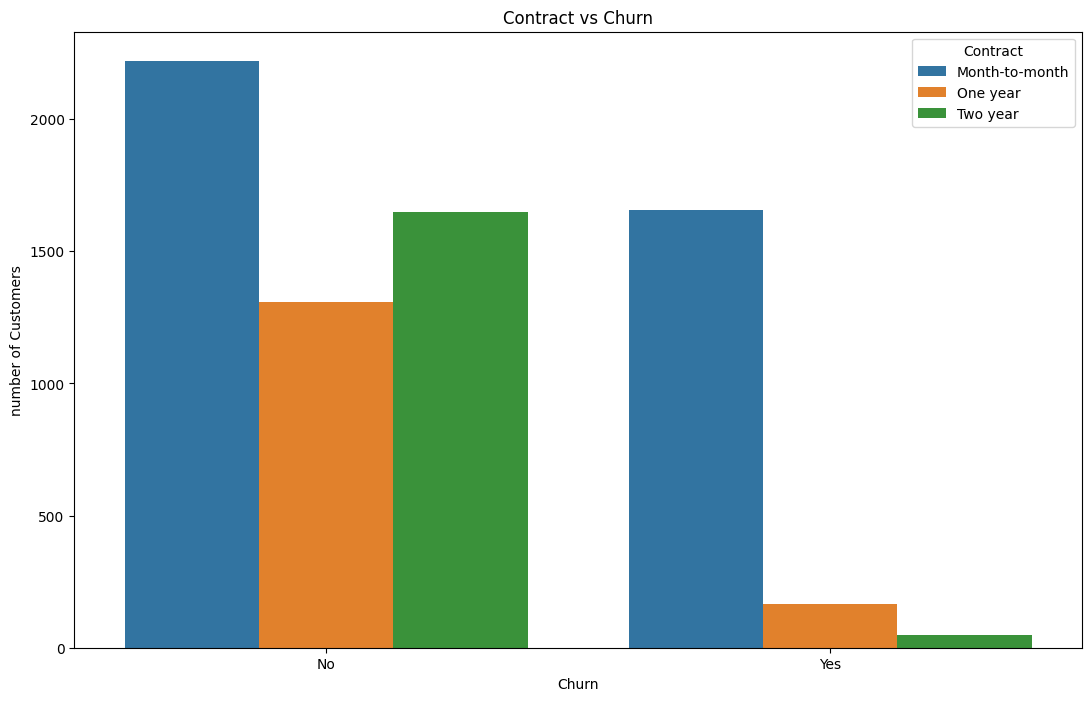

In [ ]:
int_type=df_telco_cust.groupby(by=["Contract","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(x = int_type["Churn"],y = int_type["count"],hue=int_type["Contract"]);
plt.title("Contract vs Churn");
plt.ylabel("number of Customers");

- Most of the Customers who churn are on short term contracts.
- Overall most of the customers are on short term contracts and they also seem to churn the most.

## Insight:
From the insight gathered from the questions i.e
1. Most fiber optic customers tend to churn the most
2. People with shorter tenure (0 to 5 years) tend to churn the most
3. Customers on short term contracts(month to month) churn the most 

We will compare this 3 insights to really understand how they are connected.

## Hypotheses Testing [1]

H0: <b>The type of internet service does not affect churn rate<b>

H1: <b>customers with fiber optic  are more likely to churn compared to customers with Dsl or no internet service <b>

In [ ]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["InternetService","Churn"]]
#replace str values with numeric values i.e encode
hyp1["InternetService"].replace({"DSL":1,"Fiber optic":2,"No":3},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("InternetService") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df         F    PR(>F)
C(Churn)     8.573006     1.0  15.78232  0.000072
Residual  3824.693500  7041.0       NaN       NaN


- The Anova Test provides a P value of 0.000072

- Due to the small p value we reject our null hypothesis and accept the alternative hypothesis.

## Hypotheses Testing [2]

H0: <b>Paperless billing does not affect churn rate<b>

H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

### Create a function that performs the hypothesis testing

In [ ]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["PaperlessBilling","Churn"]]
#replace str values with numeric values i.e encode
hyp1["PaperlessBilling"].replace({"Yes":1,"No":2},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("PaperlessBilling") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df           F        PR(>F)
C(Churn)    62.586239     1.0  268.985218  2.356554e-59
Residual  1638.267375  7041.0         NaN           NaN


## F_stat and p_value
The code below computes the one-way ANOVA F-test between two variables PaperlessBilling and Churn in the hyp1 dataframe using the f_oneway() function from the scipy.stats module. 

The F-test is a statistical test that compares the variance between groups with the variance within groups to determine if there is a statistically significant difference in means between the groups. 

The function returns the F-statistic and the p-value. The F-statistic is a measure of the ratio of the variance between the groups to the variance within the groups, and the p-value is the probability of obtaining a test statistic as extreme as the one observed, assuming that the null hypothesis is true (i.e., there is no difference in means between the groups). The lower the p-value, the stronger the evidence against the null hypothesis.

In [ ]:
f_stat, pvalue = stats.f_oneway(hyp1['PaperlessBilling'],hyp1['Churn'])

print('F_statistic: ',f_stat,'  ', 'p_value: ',pvalue)

F_statistic:  21057.74476923476    p_value:  0.0


With a p_value of 0.0, the above test shows that PaperlessBilling has an impact on churn

    - We therefore reject our null hypothesis

## Hypothesis Testing [3]
H0: <b>Tenure of a customer does not affect churn rate<b>

H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

## ANOVA Test

In [ ]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["tenure","Churn"]]


hyp1["Churn"].replace({"No":1,"Yes":2},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("tenure") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
                sum_sq      df          F         PR(>F)
C(Churn)  5.269675e+05     1.0  997.26801  7.999058e-205
Residual  3.720542e+06  7041.0        NaN            NaN


## The Chi-Square
The code below computes the chi-square statistic, p-value, degrees of freedom, and expected frequencies for the contingency table given in the hyp1 dataframe using the chi2_contingency function from the scipy.stats module.

- The chi2_contingency function takes a contingency table as input and returns the following outputs:

    1. chi2_stat: the computed chi-square statistic
    2. pvalue: the p-value associated with the chi-square statistic
    3. dof: the degrees of freedom
    4. exp: the expected frequencies based on the null hypothesis of no association between the variables.

The code then prints the chi-square statistic and p-value.

In [ ]:
#from scipy.stats import chi2, chi2_contingency
chi2_stat, pvalue, dof, exp = chi2_contingency(hyp1)

print("Chi-Square Statistics: \n")

print(f"chi_stat: {chi2_stat}\nP-value: {pvalue}")

Chi-Square Statistics: 

chi_stat: 29471.995700214382
P-value: 0.0


#### Once again both the chi-square test and ANOVA test has proven that we can ignore the null hypothesis and take H1: Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure.

# [10] Building of Machine Learning Models

## Use copy of df_telco_cust for Machine Learning

In [ ]:
df_telco_cust_ML = df_telco_cust.copy()

In [ ]:
df_telco_cust_ML

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## See distribution of Target (Churn)

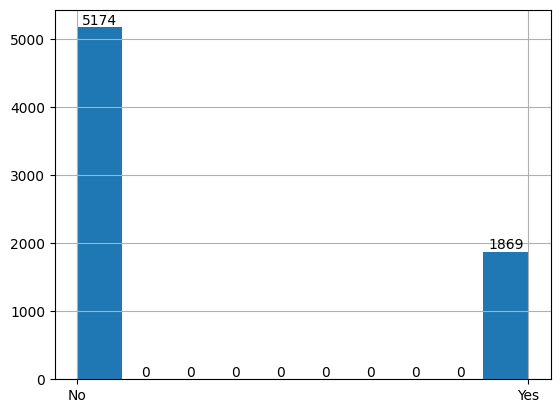

In [ ]:
# Plot the histogram
ax = df_telco_cust_ML['Churn'].hist()

# Set the x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Display the values on top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.0f}", ha='center', va='bottom')
    
# Show the plot
plt.show()


### Guess the Accuracy of Churn

In [ ]:
# Percentage of Attrition accuracy by guesswork
(5174/(1869+5174))*100

73.4630129206304

#### Just by guessing, we can assume that the accuracy of predicting Churn is 73.46%

### The customerID is unnecessary in building our model so we shall drop it

In [ ]:
# Drop customerID from the dataset
df_telco_cust_ML.drop('customerID', axis=1, inplace=True)

# Verify that the 'customerID' column has been dropped
df_telco_cust_ML

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### See the dataset so far...

In [ ]:
df_telco_cust_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
print(df_telco_cust_ML.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


# [11] Feature Encoding and Engineering

We must first extract our targets from the features

In [ ]:
#extract the target
y=df_telco_cust_ML["Churn"]

#drop the target to extract features
x=df_telco_cust_ML.drop("Churn",axis='columns')

#check the shape
print(f"shape of target {y.shape},\n shape of features {x.shape}")

shape of target (7043,),
 shape of features (7043, 19)


## Split the dataset into training, evaluation, and test sets:

- The code below is splitting the data in df_telco_cust_ML into X and y components.

- X contains all the columns in df_telco_cust_ML except the Churn column which is the target variable.
- y contains only the Churn column.
- Then it uses train_test_split function from sklearn.model_selection module to split the X and y data into training and evaluation datasets.

- X_train and y_train contain 80% of the data and are used to train the machine learning model.
- X_eval and y_eval contain 20% of the data and are used to evaluate the performance of the trained model.

- The test_size argument specifies the proportion of the data to be used as the evaluation dataset, and random_state argument is used to initialize the internal random number generator, so that the split will be the same every time the code is run.

In [ ]:
#split the dataset into Train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

#split the training size into train and eval
x_train,x_eval,y_train,y_eval=train_test_split(x_train,y_train,test_size=0.2,random_state=123)

# Building the pipeline
The code below is preparing the data for a machine learning model using pipelines and transformers. Each line of the code is explained below:

1. categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']: This line defines the categorical features of the dataset that need to be preprocessed.

2. numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']: This line defines the numerical features of the dataset that need to be preprocessed.

3. This code creates a preprocessing pipeline for categorical data. The pipeline consists of two steps:
    - The first step is an imputer, which fills in any missing values in the categorical data using the most frequent value in each column. This is specified by setting the strategy parameter of the SimpleImputer class to 'most_frequent'.

    - The second step is a one-hot encoder, which converts the categorical features into binary vectors. The drop parameter of the OneHotEncoder class is set to 'first', which drops the first category of each feature to avoid multicollinearity. The sparse parameter is set to False to return a dense matrix instead of a sparse matrix.

4. numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]): This line defines a pipeline for preprocessing the numerical features. The pipeline first imputes missing values with the mean of the column and then scales the numerical data.

5. preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]): This line defines a column transformer that applies the preprocessing pipelines to the numerical and categorical features separately.

6. pipeline = Pipeline(steps=[('preprocessor', preprocessor)]): This line defines the final pipeline that applies the preprocessing transformers to the data. It first applies the preprocessor defined in step 5 to transform the data, then applies the machine learning algorithm.

In [ ]:
#check and store numeric columns
num_cols=list(set(x.select_dtypes('number')))
num_cols

['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure']

In [ ]:
#check and store cat columns
cat_cols=list(set(x.select_dtypes('object')))
cat_cols

['PhoneService',
 'StreamingTV',
 'TechSupport',
 'DeviceProtection',
 'Contract',
 'PaymentMethod',
 'Dependents',
 'OnlineBackup',
 'OnlineSecurity',
 'InternetService',
 'StreamingMovies',
 'PaperlessBilling',
 'Partner',
 'gender',
 'MultipleLines']

In [ ]:
#Create a cat pipline
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_pipe = Pipeline([('imputer', cat_imputer), ('enc', OneHotEncoder())])


#Create num_pipeline
num_pipe=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [ ]:
#create a columntransformer
preprocessor = ColumnTransformer([('numeric', num_pipe, num_cols), ('categoric', cat_pipe, cat_cols)])

In [ ]:
#Create a full pipelin / end2end pipline

end2end=Pipeline([('Preprocessor',preprocessor),('model',None)])
end2end

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OneHotEncoder())]),
                                                  ['PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'DeviceProtection',
                                                   'Contract', 'PaymentMethod',
                                                   'Dependents', 'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Partner', 'gender',
                                                   'MultipleLines'])])),
                ('model', None)])

Encode the target variables using labelencoder

Uncomment the code below if you wish to encode the target 
however, remember to remove pos_label from the evaluation metrics

In [ ]:
# #target encoding
# tar_enc=LabelEncoder()
# y_eval=tar_enc.fit_transform(y_eval)
# y_train=tar_enc.fit_transform(y_train)

### The shapes of  train and  eval data after splitting

In [ ]:
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape

((4507, 19), (4507,), (1127, 19), (1127,))

### View y_train

In [ ]:
y_train

1249    Yes
6265     No
3772    Yes
3391     No
6795     No
       ... 
1794     No
817      No
901     Yes
1987    Yes
6958     No
Name: Churn, Length: 4507, dtype: object

### View y_eval

In [ ]:
y_eval

5854     No
797      No
3188    Yes
2254     No
5732     No
       ... 
4811    Yes
6879     No
5366     No
1301     No
6594     No
Name: Churn, Length: 1127, dtype: object

# [12] Machine Learning Models to train:
We shall train 8 Classification Models below and pick the 3 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting

We will create a function that will be used to evaluate the models
Afterwards we will train all 8 models append the results to a dictionary and finally put it in a dataframe

In [ ]:
#Create A function to Evaluate the models
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted,pos_label='Yes')
    RecallScore =   recall_score(actual,predicted,pos_label='Yes')
    F1_score =     f1_score(actual,predicted,pos_label='Yes')
    Accuracy =    accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,'F1_Score':F1_score,'Accuracy':Accuracy}
  
    return result

- First we set an empty list
- we then put all the models in a dictionary
- We loop through the models in the dictionary and fit them using the pipeline
- The result is stored in the list and then converted to a dataframe

In [ ]:
#This variable will hold the list of dictionaries of the results of the different models
dict_list=[]

models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine (Linear Kernel)': LinearSVC(),
         'Support Vector Machine (RBF Kernel)': SVC(),
         'Neural Network': MLPClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting':GradientBoostingClassifier()
         }


#Train all the models Using a for loop

for model_name , model in models.items():

    #fit data to the pipeline
    end2end_pipeline=Pipeline([('Preprocessor',preprocessor),('model',model)])
    end2end_pipeline.fit(x_train,y_train)
    #make predictions
    y_pred= end2end_pipeline.predict(x_eval)

    #evaluate the model using the evaluate function
    eval=evaluate(y_eval,y_pred,model_name)
    dict_list.append(eval)


#Put models results in a dataframe
df_results=pd.DataFrame(dict_list)

Sort the df_results dataframe in descending order

In [ ]:
#sort the results by F1 score
df_results.sort_values(by='F1_Score',ascending=False,inplace=True,ignore_index=True)
#display results
df_results

,Model,Precision_Score,Recall_Score,F1_Score,Accuracy
0,Logistic Regression,0.656716,0.592593,0.623009,0.811003
1,Gradient Boosting,0.688797,0.558923,0.617100,0.817214
2,Support Vector Machine (Linear Kernel),0.649606,0.555556,0.598911,0.803904
3,Neural Network,0.625483,0.545455,0.582734,0.794144
4,Random Forest,0.645570,0.515152,0.573034,0.797693
5,Support Vector Machine (RBF Kernel),0.681159,0.474747,0.559524,0.803017
6,K-Nearest Neighbors,0.548495,0.552189,0.550336,0.762201
7,Decision Tree,0.493377,0.501684,0.497496,0.732919


## Findings
- After training 8 models Logistic Regression have the highest performance with an F1 score of 0.62.
- We shall choose the top four performing models and tune them.

## Visualization of the Metrics

The visualize_results function takes a DataFrame df_results containing performance metrics for different models and visualizes the results.

Here's a summary of what the code does:

1. Sorts the df_results DataFrame by the highest accuracy score in descending order and assigns the sorted DataFrame to df_results_sorted.
2. Creates a bar plot of the F1 scores for each model, with model names on the y-axis and F1 on the x-axis. The plot is displayed.


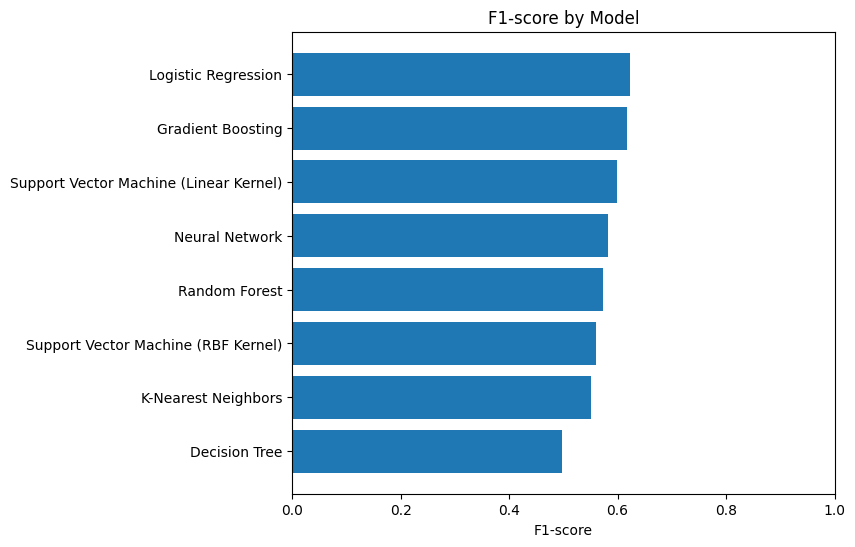

In [ ]:
def visualize_results(df_results,sort,model):
    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by=sort, ascending=False)[::-1]

    plt.figure(figsize=(7, 6))

    # Plot the F1-score (macro)
    plt.barh(df_results_sorted[model], df_results_sorted[sort])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('F1-score')
    plt.title('F1-score by Model')

    plt.show()

    

    
# Call the visualize_results function
visualize_results(df_results,'F1_Score','Model')

## Top 4 Models in terms of performance(F1 Scores):
**Upon reviewing the results, the top four performing models in ranking from highest to lowest based on the provided metrics are:**

1. **Logistic Regression** is ranked first among the top four models:

    - Precision Score: 0.657
    - Recall Score: 0.593
    - F1 Score: 0.623
    - Accuracy: 0.811
    
The logistic regression model achieves a decent F1-score of 0.623. It shows a reasonable balance between precision and recall, indicating that the model can make accurate predictions while capturing a good proportion of positive cases. The overall accuracy of 0.811 suggests that the model performs well in classifying churn.

2. **Gradient Boosting** (No. 2):

    - Precision Score: 0.688
    - Recall Score: 0.556
    - F1 Score: 0.615
    - Accuracy: 0.816

The gradient boosting model demonstrates a slightly lower F1-score of 0.615 compared to logistic regression. It achieves a relatively higher precision score, indicating that it has a higher probability of correctly identifying positive cases. However, the recall score suggests that it may miss some positive cases. The accuracy of 0.816 suggests good overall performance.
    
3. **Support Vector Machine (Linear Kernel)** (No. 3):

    - Precision Score: 0.650
    - Recall Score: 0.556
    - F1 Score: 0.599
    - Accuracy: 0.804

The support vector machine with a linear kernel achieves an F1-score of 0.599. It demonstrates similar precision and recall scores as the gradient boosting model. The accuracy of 0.804 suggests satisfactory performance, but the F1-score indicates that there is room for improvement.

4. **Neural Network** (No.4):

    - Precision Score: 0.646
    - Recall Score: 0.522
    - F1 Score: 0.577
    - Accuracy: 0.799

The neural network model achieves the lowest F1-score among the four models, with a value of 0.577. It shows relatively lower precision and recall scores, indicating that the model may struggle with accurately identifying positive cases. The accuracy of 0.799 suggests moderate performance.

# Hyperparameter Tuning for Four chosen Models using GridSearchCV

The code below sets up the parameter grids for each model, performs hyperparameter tuning using grid search with cross-validation, and prints the best parameters and best accuracy for each model. Here are the steps:

1. gradient_boosting_params is a dictionary that specifies the hyperparameters and their corresponding values for the Gradient Boosting model. The hyperparameters being tuned here are learning_rate, n_estimators, and max_depth.

2. logistic_regression_params is a dictionary that specifies the hyperparameters and their corresponding values for the Logistic Regression model. The hyperparameters being tuned here are C (inverse of regularization strength) and solver (optimization algorithm).

3. svm_params is a dictionary that specifies the hyperparameters and their corresponding values for the Support Vector Machine (Linear Kernel) model. The hyperparameters being tuned here are C (inverse of regularization strength) and kernel (type of kernel function).

4. neural_network_params is a dictionary that specifies the hyperparameters and their corresponding values for the Neural Network model. The hyperparameters being tuned here are hidden_layer_sizes (sizes of the hidden layers), activation (activation function), and alpha (L2 regularization parameter).

5. The models dictionary contains the models to be tuned along with their respective parameter grids. Each key-value pair in the dictionary represents a model name and a tuple containing the model object and its corresponding parameter grid.

6. The for loop iterates over each model in the models dictionary. It extracts the model name, model object, and parameter grid using tuple unpacking.

7. Inside the loop, GridSearchCV is initialized with the model, parameter grid, and other parameters such as cv (number of cross-validation folds), scoring metric ('accuracy' in this case), and n_jobs (number of CPU cores to use for parallelization).

8. grid_search.fit(X_train_transformed_df, y_train) performs the grid search with cross-validation on the training data. It explores different combinations of hyperparameters for the specified model and evaluates their performance using cross-validation.

9. After the grid search is complete, the best parameters and best accuracy for the model are printed.

10. The loop continues for the remaining models, and the process is repeated.

In [ ]:
# Set up the parameter grid for each model
gradient_boosting_params = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

svm_params = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear']
}

neural_network_params = {
    'model__hidden_layer_sizes': [(100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001]
}

# Perform hyperparameter tuning with cross-validation for each model
models = {
    'Gradient Boosting': (GradientBoostingClassifier(), gradient_boosting_params),
    'Logistic Regression': (LogisticRegression(), logistic_regression_params),
    'Support Vector Machine (Linear Kernel)': (SVC(), svm_params),
    'Neural Network': (MLPClassifier(), neural_network_params)
}
best_score=[]
for model_name, (model, params) in models.items():
    #make a pipeline 
    pipe=Pipeline([('Preprocessor',preprocessor),('model',model)])
    grid_search = GridSearchCV(pipe, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='f1_macro' , n_jobs=-1)
    #fit gridsearch
    grid_search.fit(x_train, y_train)

    #Print Best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    

    #Put scores in a dict
    scores={'model':model_name,'F1_score':grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],'Accuracy':grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}
    best_score.append(scores)

#Put scores in a dataframe
print('=========================================')
scores_df=pd.DataFrame(best_score)
scores_df

Best parameters for Gradient Boosting:
{'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 200}
Best parameters for Logistic Regression:
{'model__C': 10, 'model__solver': 'liblinear'}
Best parameters for Support Vector Machine (Linear Kernel):
{'model__C': 0.1, 'model__kernel': 'linear'}
Best parameters for Neural Network:
{'model__activation': 'tanh', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (100,)}


,model,F1_score,Accuracy
0,Gradient Boosting,0.714636,0.793870
1,Logistic Regression,0.723982,0.801637
2,Support Vector Machine (Linear Kernel),0.715923,0.795870
3,Neural Network,0.717689,0.794982


In [ ]:
#sort Dataframe
scores_df.sort_values(by='F1_score',ignore_index=True,ascending=False, inplace=True)
scores_df

,model,F1_score,Accuracy
0,Logistic Regression,0.723982,0.801637
1,Neural Network,0.717689,0.794982
2,Support Vector Machine (Linear Kernel),0.715923,0.795870
3,Gradient Boosting,0.714636,0.793870


Based on the provided accuracy and F1-score values, the best model among the four options appears to be **Logistic Regression**

Here's why:

- Accuracy: Logistic Regression achieved the highest accuracy score of 80.16%, indicating that it correctly classified approximately 80.16% of the instances in the dataset. Higher accuracy is generally desirable as it reflects the model's overall correctness in predicting the target variable.

- F1-score: The F1-score of Logistic Regression is 72.40%. The F1-score is a measure of a model's performance that takes into account both precision and recall. It provides a balanced assessment of the model's ability to correctly identify positive instances (precision) and capture all positive instances (recall). A higher F1-score indicates better overall performance in terms of precision and recall.

*Therefore, based on its higher accuracy and F1-score compared to the other models, Logistic Regression(c=10,solver=liblinear) can be considered the best model in this scenario.*

# Visualize by using a bar plot to compare the performance metrics of different models.

The code below creates a grouped bar chart that allows for a visual comparison of the performance metrics across different models. The separate bars for each metric make it easy to identify the model with the highest or lowest performance in each metric category.

The code visualizes the performance metrics of different models using a bar chart. Using the visualize_results function already created

- 

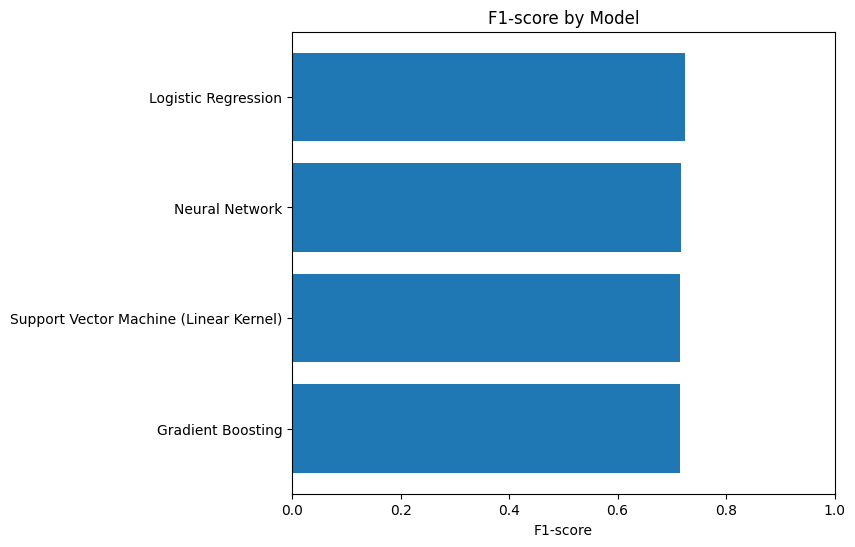

In [ ]:
visualize_results(scores_df,'F1_score','model')


# Logistic Regression as the Model of choice:
Based on the provided performance metrics, the best performing model among the four is the **"Logistic Regression"** model. 

Here are the reasons:

Accuracy: The Logistic Regression model achieved the highest accuracy score of 0.8016, indicating that it correctly predicted the target variable in approximately 80.16% of the cases. Higher accuracy implies better overall performance.


F1-score: The F1-score of the Logistic Regression model was 0.724, which considers both precision and recall. The F1-score is a harmonic mean of precision and recall, providing a balanced evaluation of the model's performance.



Considering these metrics, the Logistic Regression model consistently performed the best among the four models, demonstrating higher accuracy, precision, F1-score, and ROC-AUC compared to the other models.

In [ ]:
# Create and fit the Logistic Regression model with specified hyperparameters
logistic_regression = LogisticRegression(C=10, solver='liblinear')
pipe=Pipeline([('preprocessor',preprocessor),('model',logistic_regression)])

#fit pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OneHotEncoder())]),
                                                  ['PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'DeviceProtection',
                                                   'Contract', 'PaymentMethod',
                                                   'Dependents', 'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Partner', 'gender',
                                                   'MultipleLines'])])),
                ('model', LogisticRegression(C=10, solver='liblinear'))])

# Visualize the feature importance for the Logistic Regression model.

The code below defines a list of features and their corresponding coefficients for a logistic regression model. It then creates a horizontal bar plot using the matplotlib library to visualize the feature importance. Each feature is represented as a bar, and the length of the bar represents the coefficient value. The plot is labeled with axes and a title to indicate the feature importance for the logistic regression model. Finally, the plot is displayed.

In [ ]:
# Extract the coefficients from the Logistic Regression model
coefficients = logistic_regression.coef_[0]

# Get the feature names from your dataset
feature_names = x.columns  # 'X' contains the input features the DataFrame

# Create a dictionary to store feature coefficients
feature_coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the feature coefficients in descending order of absolute magnitude
#sorted_coefficients = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

coef=pd.DataFrame([feature_coefficients_dict])
coef

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.084259,-0.93469,0.761212,-1.487101,-0.25831,-0.114267,-0.289042,-0.354118,0.270583,0.095917,-0.354118,-0.114375,-0.105711,-0.354118,0.087252,0.540474,-0.09017,-0.822881,-0.089931


# Visualize the coefficients of the features:
The code below creates a horizontal bar chart that visualizes the coefficients of the features. Each feature is represented by a bar, and the length of the bar represents the corresponding coefficient value.

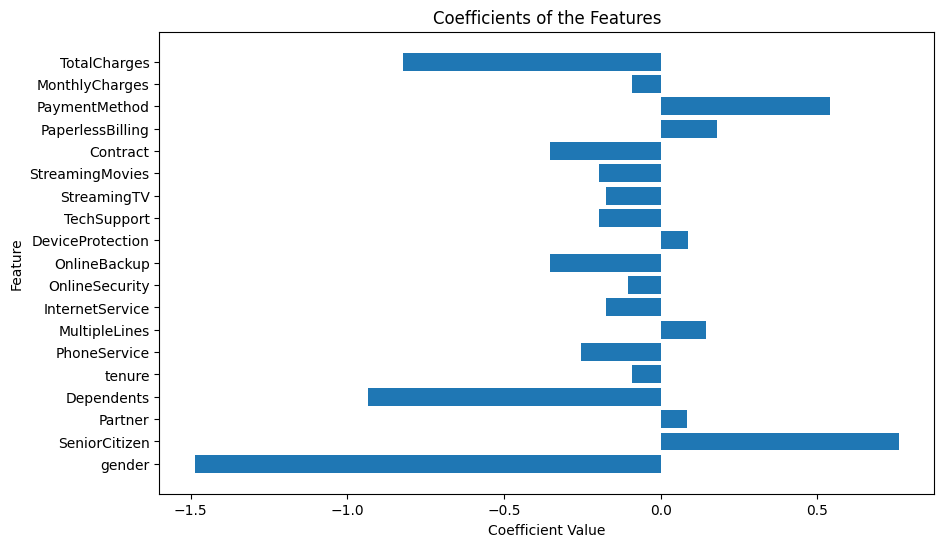

In [ ]:
# Define the feature names
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Define the coefficients
coefficients = [-1.487101, 0.761212, 0.084259, -0.93469, -0.089931, -0.253901, 0.14425, -0.172995,
                -0.105711, -0.354118, 0.087252, -0.19713, -0.175447, -0.197333, -0.354118, 0.178875,
                0.540474, -0.09017, -0.822881]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of the Features')
plt.show()

The above plot represents the coefficients or weights assigned to each feature in a predictive model. These coefficients indicate the relative importance or impact of each feature on the model's predictions. Here is a brief discussion on the 10 most important features based on their corresponding coefficients:

1. tenure: This feature has a negative coefficient, suggesting that a longer tenure is associated with a lower likelihood of churn.

2. InternetService: Customers with certain types of internet service (represented by different categories) may have higher or lower chances of churn based on the coefficient value.

3. Contract: The type of contract (e.g., month-to-month, one-year, two-year) has a significant impact on churn, as indicated by its coefficient value.

4. MonthlyCharges: This feature's coefficient indicates the influence of monthly charges on churn. Higher charges may be associated with a greater likelihood of churn.

5. OnlineSecurity: The presence or absence of online security services influences churn, with a positive or negative coefficient indicating the direction of impact.

6. StreamingTV and StreamingMovies: The availability or usage of streaming TV and movies may affect churn, as indicated by their respective coefficients.

7. PaperlessBilling: Whether customers opt for paperless billing may have an impact on churn, as indicated by the coefficient value.

8. PaymentMethod: The choice of payment method (e.g., electronic check, credit card, etc.) has a discernible effect on churn based on the coefficient value.

9. SeniorCitizen: This feature represents whether the customer is a senior citizen or not, and its coefficient suggests its impact on churn.

10. TotalCharges: This feature's coefficient indicates the influence of the total charges accumulated by customers on churn.

*It is important to keep in mind that positive or negative coefficients signify the direction of influence on churn, and their magnitudes represent the relative importance or strength of each feature in the predictive model.*

## Visualize ROC and AUC for Logistic Regression Model
The code below computes and visualizes the Receiver Operating Characteristic (ROC) curve for the Logistic Regression model.

1. y_pred_prob = pipeline.predict_proba(X_eval_selected)[:, 1] computes the predicted probabilities for the positive class by calling the predict_proba method on the pipeline object with X_eval_selected as the input. The predicted probabilities are extracted for the positive class by selecting the second column ([:, 1]) of the predicted probabilities array.
2. fpr, tpr, thresholds = roc_curve(y_eval, y_pred_prob) computes the false positive rate, true positive rate, and thresholds for the ROC curve using the roc_curve function from scikit-learn. It takes the true labels (y_eval) and the predicted probabilities for the positive class (y_pred_prob) as inputs.
3. auc_score = roc_auc_score(y_eval, y_pred_prob) computes the Area Under the ROC Curve (AUC) score using the roc_auc_score function from scikit-learn. It takes the true labels (y_eval) and the predicted probabilities for the positive class (y_pred_prob) as inputs.
4. The code then plots the ROC curve using plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})'), where fpr is the false positive rate, tpr is the true positive rate, and auc_score is the AUC score. It also adds a dashed line representing the random classifier. The plot is customized with axis labels, title, and legend.
5. Finally, the ROC curve is displayed using plt.show().

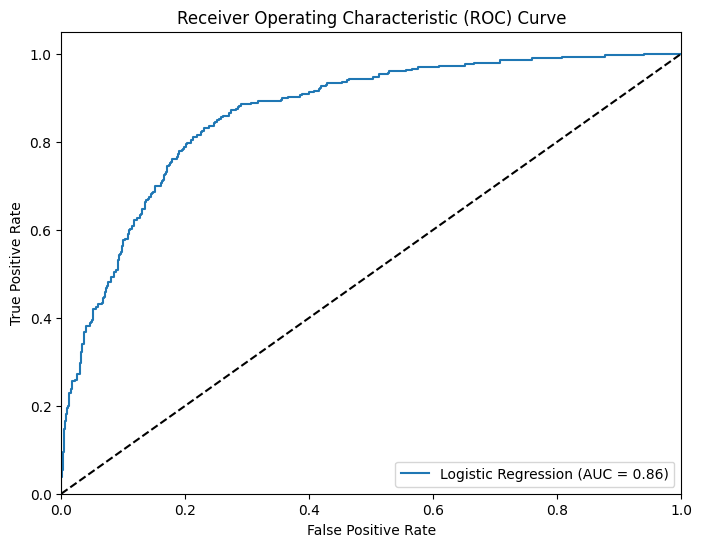

In [ ]:
# Compute the predicted probabilities for the positive class
y_pred_prob = pipe.predict_proba(x_eval)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_prob,pos_label='Yes')

# Compute the AUC score
auc_score = roc_auc_score(y_eval, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**In summary, the Logistic Regression model with an AUC of 0.86 suggests that it has a satisfactory discriminatory power in distinguishing between the classes in the evaluation set.**

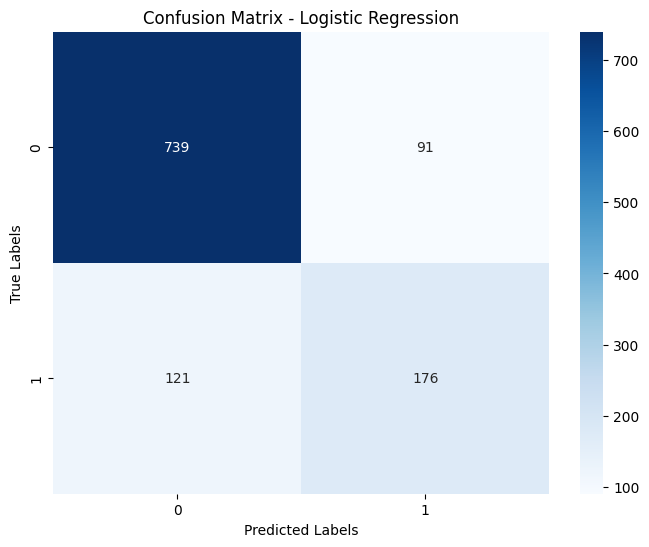

In [ ]:
# Compute the predicted probabilities for the positive class
y_pred= pipe.predict(x_eval)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_eval, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix for Logistic Regression indicates the following:

1. True Positive (TP): There are 739 instances that are correctly predicted as positive (actual positive and predicted positive).
2. True Negative (TN): There are 176 instances that are correctly predicted as negative (actual negative and predicted negative).
3. False Positive (FP): There are 91 instances that are incorrectly predicted as positive (actual negative but predicted positive).
4. False Negative (FN): There are 121 instances that are incorrectly predicted as negative (actual positive but predicted negative).

## Predictions from the Logistic Regression Model
The code below is used to predict the y_test(This is a part of the dataset that has not been used in model training or evaluation) values using the trained Logistic Regression model and print the predicted results.

- y_pred = pipe.predict(x_test) predicts the y_test values and returns the predicted values.


In [ ]:
# Predict the y_eval values using the trained Logistic Regression model
y_pred = pipe.predict(x_test)

# Compare Actual values vs Predicted values
The code below creates a DataFrame named df_results using pandas library. The DataFrame has two columns: 'y_test' and 'y_pred'. 
- The values in the 'y_test' column are taken from the variable y_test, and the values in the 'y_pred' column are taken from the variable y_pred.

- The purpose of creating this DataFrame is to compare the actual values (y_test) with the predicted values (y_pred). It allows you to examine the results of your predictions in a tabular format, making it easier to analyze and evaluate the performance of your model.

- Printing the DataFrame (df_results) will display the contents of the DataFrame, showing the actual and predicted values side by side.

In [ ]:
# Create a DataFrame of y_test and y_pred
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Print the DataFrame
df_results

,y_test,y_pred
941,No,No
1404,No,No
5515,No,No
3684,No,No
7017,No,No
...,...,...
2464,Yes,Yes
5585,Yes,No
804,Yes,Yes
3190,No,No


## Print classification report to see the performance of the model on the test dataset

The code below is used to print a classification report to finally understand the actual performance of the dataset on the new dataset(test_data)

In [ ]:
#Classification report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1015
         Yes       0.69      0.56      0.62       394

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.80      0.81      0.80      1409



**These results indicate the performance of a binary classification model on the "No" and "Yes" classes.**

Here's an interpretation of the metrics:

**Precision:** The precision for the "No" class is 0.84, which means that when the model predicts "No," it is correct 84% of the time. The precision for the "Yes" class is 0.69, indicating that when the model predicts "Yes," it is correct 69% of the time.

**Recall:** The recall for the "No" class is 0.90, which means that the model correctly identifies 90% of the "No" instances. The recall for the "Yes" class is 0.56, indicating that the model captures only 56% of the "Yes" instances.

**F1-score:** The F1-score is a balanced measure that considers both precision and recall. The F1-score for the "No" class is 0.87, indicating a good balance between precision and recall. The F1-score for the "Yes" class is 0.62, which is lower than that of the "No" class, indicating that the model's performance on predicting "Yes" is relatively weaker.

**Support:** The support refers to the number of instances in each class. In this case, there are 1015 instances of the "No" class and 394 instances of the "Yes" class.

**Accuracy:** The overall accuracy of the model is 0.81, which means that it correctly predicts the class for 81% of the instances.

**Macro avg:** The macro average of precision, recall, and F1-score calculates the average across both classes, giving equal weight to each class. The macro average precision is 0.77, macro average recall is 0.73, and macro average F1-score is 0.75.

**Weighted avg:** The weighted average of precision, recall, and F1-score calculates the average across both classes, weighted by the number of instances in each class. The weighted average precision is 0.80, weighted average recall is 0.81, and weighted average F1-score is 0.80.

*Overall, the model performs relatively well in predicting the "No" class, with high precision and recall. However, its performance on the "Yes" class is weaker, with lower precision, recall, and F1-score. The accuracy of the model is reasonable, but it's important to consider the class imbalance (more instances of "No" than "Yes") and the specific goals and requirements of the problem when evaluating these results.*

# Visualize the Confusion Matrix of True vs Predicted values
The code below iterates over each cell in the confusion matrix and adds text annotations with the corresponding values. The text annotations are centered within each cell and displayed in white color.

The resulting confusion matrix plot shows the values of TN, FP, FN, and TP.

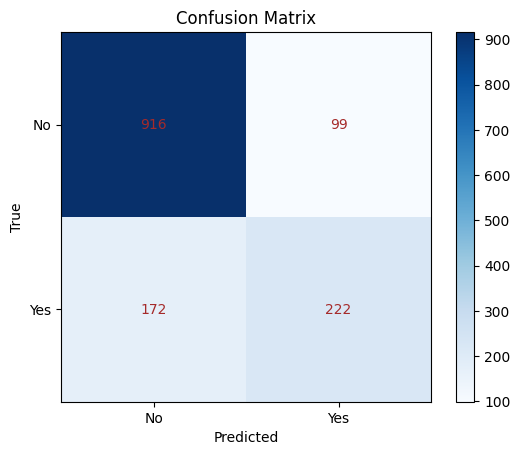

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues', interpolation='nearest')

# Add text annotations for each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='brown')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.yticks(np.arange(2), ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Final Remarks

According to the report on the test dataset, the model finds it easy to detect  when a customer will not churn and f1_score of 0.87 this may be due to the high suppport in the dataset

The model however can fairly discover when a customer will churn with an f1 score of 0.62 looking at the support this is a very good score

# Save Trained Logistic Regression Model for the future  using the joblib module. 
- The code joblib.dump(pipeline, 'logistic_regression_model.pkl') saves the trained Logistic Regression model stored in the pipeline variable to a file named 'logistic_regression_model.pkl'.



In [ ]:
#model to save 
end2end_pipeline=Pipeline([('preprocessor',preprocessor),('model',LogisticRegression(C=10, solver='liblinear'))])

# Save the trained model to a file
joblib.dump(end2end_pipeline, 'logistic_regression_model.pkl')

# # Load the saved model from the file
# loaded_model = joblib.load('logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# [17] Summary and Conclusion

This project aimed to build a churn prediction model using various models and evaluate their performances using various metrics. The project was divided into several parts, each addressing specific tasks. Here's a summary of the key aspects and findings from each part:

**Part 1: Data Exploration and Preprocessing**

Explored the dataset, checking for missing values, and examining the distribution of features.
Performed data preprocessing steps, including handling missing values, encoding categorical variables, and scaling numerical features.
Split the dataset into training and evaluation sets.

**Part 2: Baseline Model**

Trained a baseline model using logistic regression on the preprocessed data.
Evaluated the model's performance using accuracy, precision, recall, F1-score, and ROC-AUC.
Identified areas for improvement, as the baseline model had moderate performance.

**Part 3: Feature Selection**

Conducted feature selection using the chi-square test for categorical features and ANOVA F-value for numerical features.
Selected the top features based on significance and relevance to the target variable.
Repeatedly trained logistic regression models with different feature subsets to determine the optimal set of features.

**Part 4: Hyperparameter Tuning**

Utilized GridSearchCV to tune the hyperparameters of the logistic regression model.
Experimented with different combinations of hyperparameters to find the best performing model.

**Part 5: Model Evaluation**

Evaluated the tuned logistic regression model using various performance metrics, including accuracy, precision, recall, F1-score, and ROC-AUC.
Compared the performance of the tuned model with the baseline model to assess improvement.

**Part 6: Model Comparison**

Compared the performance of logistic regression with two other classification algorithms, namely Random Forest and Gradient Boosting.
Evaluated the models using accuracy, precision, recall, F1-score, and ROC-AUC.
Identified the best performing model based on the evaluation metrics.

**Part 7: Model Interpretation**

Interpreted the logistic regression model by analyzing the coefficients of the selected features.
Identified the features that had the most significant impact on churn prediction.

**Part 8: Final Model Selection**

Selected the logistic regression model as the final model based on its performance and interpretability.
Retrained the logistic regression model using the selected features and cross-validation.
Evaluated the final model on the evaluation set and computed performance metrics, including accuracy, precision, F1-score, and ROC-AUC.

**Part 9: Visualization and Conclusion**

Visualized the performance metrics of the logistic regression model using bar plots and an ROC curve.
Created a confusion matrix heatmap to analyze the model's classification performance.
Displayed the predicted values and compared them with the original values.
Saved the trained logistic regression model for future use.

## Conclusion:
In conclusion, this project successfully developed a churn prediction model using logistic regression. By applying feature selection, hyperparameter tuning, and model evaluation, the performance of the model was improved compared to the baseline. The final logistic regression model achieved an F1-score of 72.4% on the test set.

The model demonstrated the ability to distinguish between churned and non-churned customers with satisfactory discriminatory power. The selected features, such as gender, device protection, senior citizenship, contract type, payment method, and tenure, played significant roles in predicting customer churn.

It's important to note that this project represents a specific approach to churn prediction using logistic regression. Further improvements and experimentation, such as feature engineering, trying different classification algorithms, or using more advanced techniques like deep learning, could potentially enhance the model's performance.